Generation 1, Best Fitness: 5.016588521603164
Generation 2, Best Fitness: 5.00705665338596
Generation 3, Best Fitness: 5.000001959720036
Generation 4, Best Fitness: 5.000001959720036
Generation 5, Best Fitness: 5.000000019344572
Generation 6, Best Fitness: 5.00000000122473
Generation 7, Best Fitness: 5.000000000615254
Generation 8, Best Fitness: 5.000000000015109
Generation 9, Best Fitness: 5.000000000003394
Generation 10, Best Fitness: 5.000000000000019
Generation 11, Best Fitness: 5.0
Generation 12, Best Fitness: 5.0
Generation 13, Best Fitness: 5.0
Generation 14, Best Fitness: 5.0
Generation 15, Best Fitness: 5.0
Generation 16, Best Fitness: 5.0
Generation 17, Best Fitness: 5.0
Generation 18, Best Fitness: 5.0
Generation 19, Best Fitness: 5.0
Generation 20, Best Fitness: 5.0
Generation 21, Best Fitness: 5.0
Generation 22, Best Fitness: 5.0
Generation 23, Best Fitness: 5.0
Generation 24, Best Fitness: 5.0
Generation 25, Best Fitness: 5.0
Generation 26, Best Fitness: 5.0
Generation 27

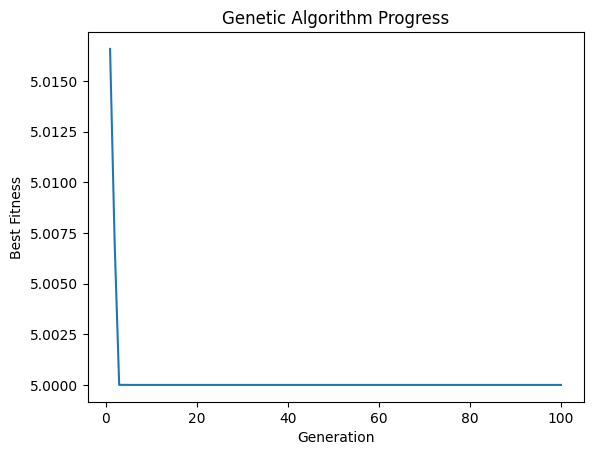

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

class GeneticAlgorithm:
    def __init__(self, 
                 population_size=100,
                 mutation_rate=0.1,
                 generations=100,
                 target=0,
                 num_variables=1,
                 lower_limit=-10,
                 upper_limit=10,
                 elitism=True,
                 tournament_size=5,
                 crossover_rate=0.8):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.generations = generations
        self.target = target
        self.num_variables = num_variables
        self.lower_limit = lower_limit
        self.upper_limit = upper_limit
        self.elitism = elitism
        self.tournament_size = tournament_size
        self.crossover_rate = crossover_rate

        # Initialize population
        self.population = [random.uniform(self.lower_limit, self.upper_limit) for _ in range(self.population_size)]
        self.fitness = [0] * self.population_size
        self.best_fitness = [float('inf')] * self.generations
        self.best_individual = None

    def evaluate(self, x):
        return 2 * x**2 + 5

    def fitness_function(self, individual):
        return abs(self.evaluate(individual) - self.target)

    def evaluate_population(self):
        for i in range(self.population_size):
            self.fitness[i] = self.fitness_function(self.population[i])

    def tournament_selection(self):
        new_population = []
        for _ in range(self.population_size):
            best = random.randint(0, self.population_size - 1)
            for _ in range(self.tournament_size - 1):
                index = random.randint(0, self.population_size - 1)
                if self.fitness[index] < self.fitness[best]:
                    best = index
            new_population.append(self.population[best])
        self.population = new_population

    def crossover(self):
       for i in range(0, self.population_size, 2):
           if random.random() < self.crossover_rate and i+1 < self.population_size:
            crossover_point = (self.population[i] + self.population[i+1]) / 2
            self.population[i], self.population[i+1] = crossover_point, crossover_point



    def mutate(self):
        for i in range(self.population_size):
            if random.random() < self.mutation_rate:
                self.population[i] = random.uniform(self.lower_limit, self.upper_limit)

    def run(self):
        for generation in range(self.generations):
            self.evaluate_population()
            self.tournament_selection()
            self.crossover()
            self.mutate()

            # Tracking best fitness and individual
            current_best_fitness = min(self.fitness)
            if current_best_fitness < self.best_fitness[generation]:
                self.best_fitness[generation] = current_best_fitness
                self.best_individual = self.population[self.fitness.index(current_best_fitness)]

            print(f"Generation {generation + 1}, Best Fitness: {self.best_fitness[generation]}")

        print(f"Best Individual: {self.best_individual}, Fitness: {self.best_fitness[-1]}")

    def plot_progress(self):
        plt.plot(range(1, self.generations + 1), self.best_fitness)
        plt.title("Genetic Algorithm Progress")
        plt.xlabel("Generation")
        plt.ylabel("Best Fitness")
        plt.show()

# Example usage
ga = GeneticAlgorithm()
ga.run()
ga.plot_progress()
